C:\Users\alexx\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


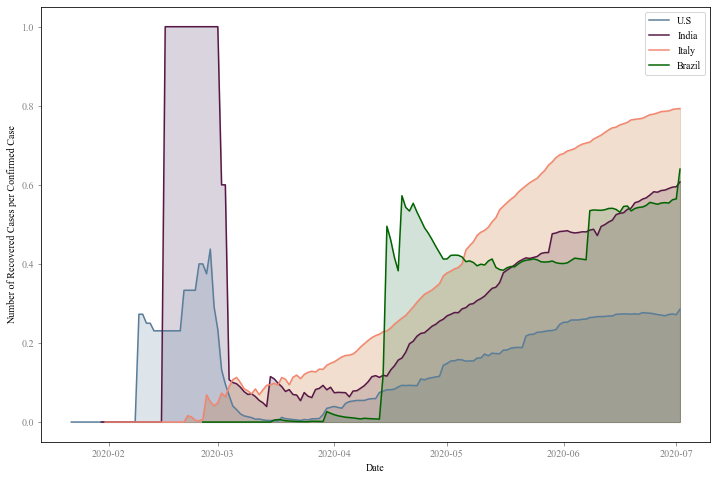

In [7]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from pylab import * 
import matplotlib.ticker as mticker

dateparse = lambda x:pd.datetime.strptime(x,'%m/%d/%Y')
indiacases = pd.read_csv('india.txt', parse_dates=['Date'], date_parser=dateparse)
uscases = pd.read_csv('us.txt', parse_dates=['Date'], date_parser=dateparse)
italycases = pd.read_csv('italy.txt', parse_dates=['Date'], date_parser=dateparse)
brazilcases = pd.read_csv('brazil.txt', parse_dates=['Date'], date_parser=dateparse)

fig= plt.figure(figsize=(12,8))

inx = indiacases.Date
iny = indiacases.Recovered/(indiacases.Confirmed) 
#/ (1.353*1000000000)
usx = uscases.Date
usy = uscases.Recovered/(uscases.Confirmed)
# / (328.2*1000000)
itx = italycases.Date
ity = italycases.Recovered/(italycases.Confirmed)
#/ (60.36*1000000)
bzx = brazilcases.Date
bzy = brazilcases.Recovered/(brazilcases.Confirmed)
#/ (209.5*1000000)
indiacases = indiacases.set_index('Date')
uscases = uscases.set_index('Date')
italycases = italycases.set_index('Date')
brazilcases = brazilcases.set_index('Date')

#csfont = {'fontname':'Comic Sans MS'}
#hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel('Date')
plt.ylabel('Number of Recovered Cases per Confirmed Case')


plt.fill_between(inx,iny,  alpha=0.2, color = '#44285D')
plt.fill_between(usx,usy, alpha=0.2, color = '#5a7d9a')
plt.fill_between(itx,ity, alpha=0.2, color = '#BB5C0D')
plt.fill_between(bzx,bzy,  alpha=0.2, color = '#24703C')

ax = gca()

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()


ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')


x_ticks = np.arange(0,3000000,500000)


plt.plot(usx, usy, color = '#5a7d9a', label = 'U.S', linewidth=1.5)
plt.plot(inx, iny, color = '#581845', label = 'India', linewidth=1.5)
plt.plot(itx, ity, color = '#f48670', label = 'Italy', linewidth=1.5)
plt.plot(bzx, bzy, color = '#006400', label = 'Brazil', linewidth=1.5)


plt.legend()
plt.show()

fig.savefig('numRecovered.png')